In [1]:
import sys
import os
path = os.getcwd()
sys.path.insert(1, path[:-4])

In [2]:
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook 

In [3]:
from core.subgraph_specializer import Graph
import numpy as np
from importlib import reload
import networkx as nx
import matplotlib.pyplot as plt
import time
import autograd.numpy as anp
import networkx as nx
import scipy.linalg as la

In [21]:
e = .01

def cha1(x):
    return 2*x % 1

def cha2(x):
    return (1-8*e)*4*x*(1-x) + 4*e

def lin1(x):
    return .17*x

def sig1(x):
    return .9*x#*anp.tanh(x)

def sig2(x):
    return .4*x#anp.tanh(x)

def sig3(x):
    return -.4*x#anp.tanh(x)

def sig4(x):
    return anp.tanh(x)

def sig5(x):
    return 1 / (1 + anp.exp(-x))

def eps(x):
    return e*x

def iden(x):
    return x

def zero(x):
    return 0*x

In [22]:
def print_matrix(A):
    out = '{'
    for line in A:
        out += '\n{'
        for item in line:
            out += str(item)
            out += ','
        out = out[:-1]
        out += '},'
    out = out[:-1]
    print(out + '\n}')

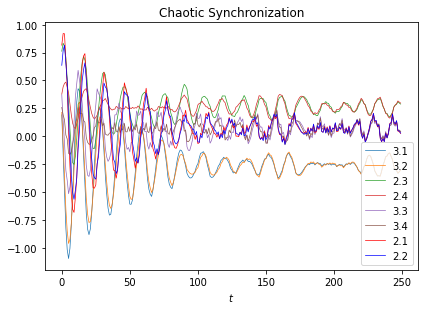

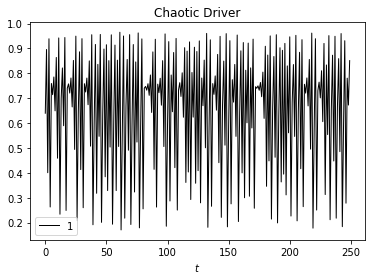

In [29]:
A = np.array([
    [0,0,0,1],
    [1,0,1,0],
    [1,1,0,0],
    [0,1,1,0]
])

f = np.array([
    [cha2,zero,zero,eps],
    [lin1,sig1,sig2,zero],
    [lin1,sig3,sig1,zero],
    [zero,sig4,sig4,zero]
])

labels = ['1','2','3','4']

G = Graph(A,labels=labels,F=f)

# G.iterate(400,np.random.random(G.n),graph=True)

base = [0,3]
G = G.specialize(base)
k = G.iterate(250,np.random.random(G.n),graph=False)

x = np.arange(0,250)

plt.plot(x, k[:,3],label=f'{G.labeler[3]}',lw=.7)
plt.plot(x, k[:,5],label=f'{G.labeler[5]}',lw=.7)


plt.plot(x, k[:,6],label=f'{G.labeler[6]}',lw=.7)
plt.plot(x, k[:,8],label=f'{G.labeler[8]}',lw=.7)


plt.plot(x, k[:,7],label=f'{G.labeler[7]}',lw=.7)
plt.plot(x, k[:,9],label=f'{G.labeler[9]}',lw=.7)


plt.plot(x, k[:,2],label=f'{G.labeler[2]}',lw=.7,color='red')
plt.plot(x, k[:,4],label=f'{G.labeler[4]}',lw=.7,color='blue')

plt.legend()
# plt.ylim(-.4,.4)
plt.tight_layout()
plt.xlabel('$t$')
plt.title('Chaotic Synchronization')
plt.savefig('chaotic_example3.pdf')
plt.show()

plt.plot(k[:,0],label=f'{G.labeler[0]}',lw=1,color='black')
plt.legend()
plt.xlabel('$t$')
plt.title('Chaotic Driver')
plt.savefig('chaotic_driver.pdf')
plt.show()

{0: '1', 1: '4', 2: '2.1', 3: '3.1', 4: '2.2', 5: '3.2', 6: '2.3', 7: '3.3', 8: '2.4', 9: '3.4'}


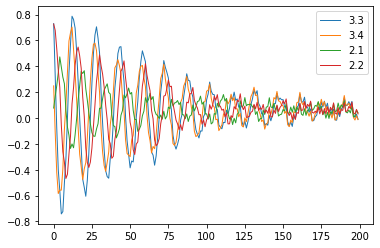

In [30]:
k = G.iterate(200,np.random.random(G.n),graph=False)
print(G.labeler)

plt.plot(k[:,7],label=f'{G.labeler[7]}',lw=1)
plt.plot(k[:,9],label=f'{G.labeler[9]}',lw=1)

plt.plot(k[:,2],label=f'{G.labeler[2]}',lw=1)
plt.plot(k[:,4],label=f'{G.labeler[4]}',lw=1)
plt.legend()
plt.show()

In [ ]:
A = np.array([
    [0,0,0,1],
    [1,0,1,0],
    [1,1,0,0],
    [0,1,1,0]
])

f = np.array([
    [cha2,zero,zero,zero],
    [lin1,sig1,sig2,zero],
    [lin1,sig3,sig1,zero],
    [zero,sig4,sig4,zero]
])

labels = ['1','2','3','4']

G = Graph(A,labels=labels,F=f)
base = [0,3]
G = G.specialize(base)
print(G.spectral_radius())
k = G.iterate(100,np.random.random(G.n),graph=False)

